<Parameter 'center': 0.0000 meV, bounds=[-inf:inf]>

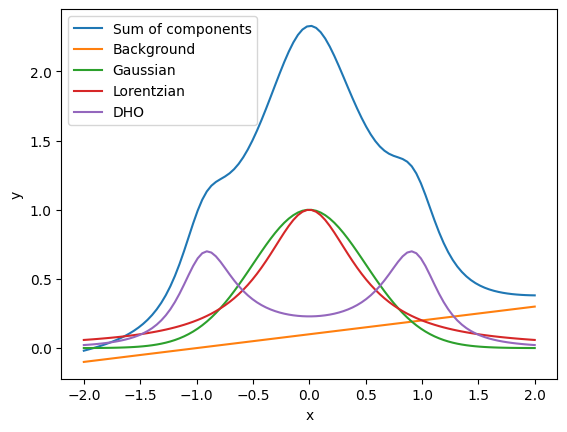

In [1]:
import numpy as np

from easydynamics.sample import GaussianComponent
from easydynamics.sample import LorentzianComponent
from easydynamics.sample import VoigtComponent
from easydynamics.sample import DHOComponent
from easydynamics.sample import PolynomialComponent
from easydynamics.sample import SampleModel

from easydynamics.resolution import ResolutionHandler


import matplotlib.pyplot as plt

Gaussian= GaussianComponent(center=0,width=0.5,amplitude=1)
Lorentzian=LorentzianComponent(center=0, width=0.5, amplitude=1)
DHO=DHOComponent(center=1, width=0.3, area=1.2)
Background=PolynomialComponent(coefficients=[0.1, 0.1])

Sample= SampleModel()
Sample.add_component(Gaussian)
Sample.add_component(Lorentzian)
Sample.add_component(Background)
Sample.add_component(DHO)



x=np.linspace(-2, 2, 100)
y=Sample.evaluate(x)
plt.plot(x, y, label='Sum of components')
plt.plot(x, Background.evaluate(x), label='Background')
plt.plot(x, Gaussian.evaluate(x), label='Gaussian')
plt.plot(x, Lorentzian.evaluate(x), label='Lorentzian')
plt.plot(x, DHO.evaluate(x), label='DHO')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')


Gaussian.amplitude
Gaussian.center


In [ ]:
# The area under the DHO curve is indeed equal to the area parameter.
xx=np.linspace(-10, 10, 10000)
yy=DHO.evaluate(xx)
area= np.trapezoid(yy, xx)
print(f"Area under DHO curve: {area:.4f}")

Area under DHO curve: 1.1998


2.0
3.0


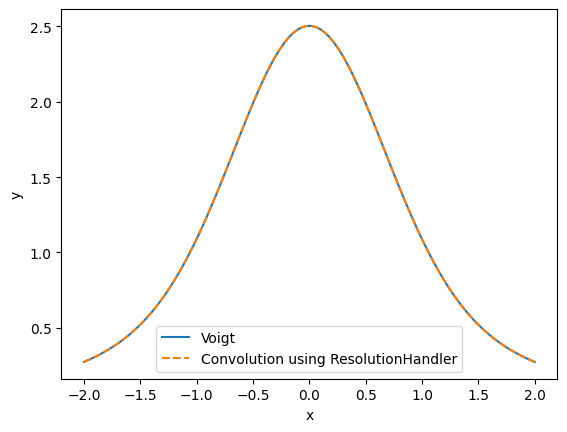

In [ ]:
# Try out the resolution handler

Gaussian= GaussianComponent(center=0,width=0.5,area=2)
Lorentzian=LorentzianComponent(center=0, width=0.5, area=3)

Sample= SampleModel()
Sample.add_component(Gaussian)

Resolution=SampleModel()
Resolution.add_component(Lorentzian)

Voigt=VoigtComponent(center=0, Gwidth=0.5, Lwidth=0.5, area=6)


x=np.linspace(-2, 2, 100)

MyResolutionHandler=ResolutionHandler()
Convolution=MyResolutionHandler.convolve(x, Sample, Resolution)


plt.plot(x, Voigt.evaluate(x), label='Voigt')
plt.plot(x, Convolution, label='Convolution using ResolutionHandler',linestyle='--')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

